In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [4]:
recovery_loss_sw = {
    'CAE-1024': 0.08411,
    'AEflow-1024': 0.07,  # ! wait for training
    'FourierLatlon-400': 0.05977,
    'FourierCartes-400': 0.05107,
    'SINRNoSkip-400': 0.04201,
    'SINR-400': 0.04156,
}
recovery_loss_era5 = {
    'CAE-1024': 0.08411*2,
    'AEflow-1024': 0.07*2,  # ! wait for training
    'FourierLatlon-400': 0.05977*2,
    'FourierCartes-400': 0.05107*2,
    'SINRNoSkip-400': 0.04201*2,
    'SINR-400': 0.04156*2,
}

In [5]:
df1 = pd.DataFrame.from_dict({'ROM': list(recovery_loss_sw.keys()), 'recovery loss': list(recovery_loss_sw.values())})
df1['dataset'] = 'shallow-water'
df2 = pd.DataFrame.from_dict({'ROM': list(recovery_loss_era5.keys()), 'recovery loss': list(recovery_loss_era5.values())})
df2['dataset'] = 'ERA5'
df = pd.concat([df1, df2], axis=0)
df

,ROM,recovery loss,dataset
0,CAE-1024,0.08411,shallow-water
1,AEflow-1024,0.07000,shallow-water
2,FourierLatlon-400,0.05977,shallow-water
3,FourierCartes-400,0.05107,shallow-water
4,SINRNoSkip-400,0.04201,shallow-water
5,SINR-400,0.04156,shallow-water
0,CAE-1024,0.16822,ERA5
1,AEflow-1024,0.14000,ERA5
2,FourierLatlon-400,0.11954,ERA5
3,FourierCartes-400,0.10214,ERA5


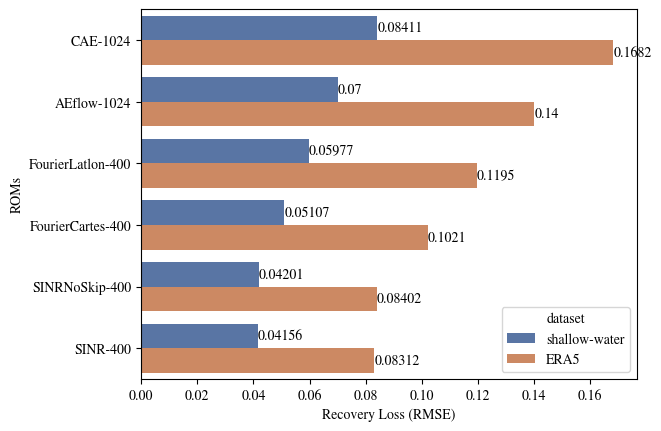

In [9]:
ax = sns.barplot(data=df, orient='h', y='ROM', x='recovery loss', hue='dataset', palette='deep')
# palette='deep', 'pastel'
# see https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial for palette configurations
ax.set_ylabel('ROMs')
ax.set_xlabel('Recovery Loss (RMSE)')
ax.bar_label(ax.containers[0], fmt='%.4g', label_type='edge')
ax.bar_label(ax.containers[1], fmt='%.4g', label_type='edge')
plt.savefig('recovery_loss.pdf', bbox_inches='tight', pad_inches=0.01)